In [1]:
# Imports

# Import Classification Parameters
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
# Import warnings filter
import warnings
# Data Reader
import pandas as pd
# Train and Test split
from sklearn.model_selection import train_test_split
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# Plot
import matplotlib.pyplot as plt
# Import of Numpy
import numpy as np

In [2]:
# ignore all future warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=Warning)


# Import the data set
df = pd.read_csv('dataset.csv')
X = df.iloc[:, [0,1, 2, 3,4,5,6,7,8,9,10,11,12]].values
y = df.iloc[:, -1].values

# Age é o índice 0 em X e o Talach é o índice 7 em X

In [3]:
# Definition of the Cost Function

def Cost_Function(X,y,theta):

    m=len(y)
    h= np.dot(X,theta)
    J= 1/(2*m)* np.sum(np.square(h - y))

    return J

In [4]:
# Gradiente da função de custo

def gradienteFuncaoCusto(X,y,theta,alpha,num_iters): # alpha é o learning rate
    
    m=len(y)
    J_custo_cada_itercao=[]
    
    for i in range(num_iters):
        h= np.dot(X,theta)
        grad = np.dot(X.transpose(),(h-y)) 
        theta= theta - np.divide(alpha, m)* grad
        
        J_custo_cada_itercao.append(Cost_Function(X,y,theta))
        
    return theta, J_custo_cada_itercao

Confusion matrix - LogReg
[[26  3]
 [ 5 26]]

Accuracy for test set for Logistic Regression =  0.8666666666666667
Precision for test set for Logistic Regression =  0.8387096774193549
True Positive Rate for test set for Logistic Regression =  0.896551724137931
True Negative Rate for test set for Logistic Regression =  0.8387096774193549
False Positive Rate for test set for Logistic Regression =  0.16129032258064513
Recall for test set for Logistic Regression =  0.896551724137931
F1 Score for test set for Logistic Regression =  0.8666666666666666
Balanced Accuracy for test set for Logistic Regression =  0.867630700778643


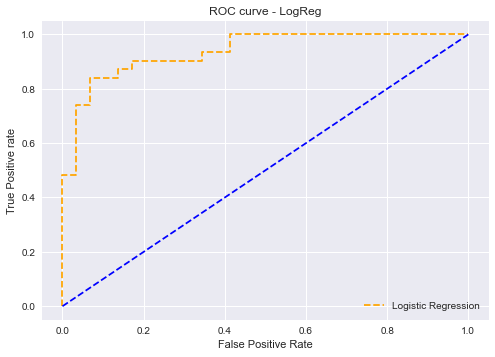

AUC Score:  0.9365962180200222
Total cost(LogReg):  11487.32627118644


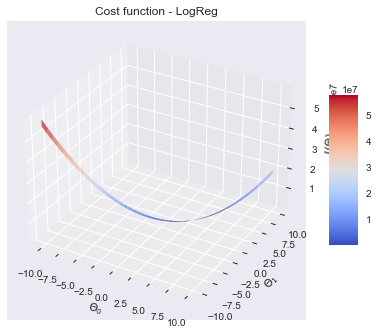

In [5]:
#########################################   Logistic Regression  #############################################################

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model and Fitting
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm_test = confusion_matrix(y_test,y_pred)
print('Confusion matrix - LogReg')
print(cm_test)

print()

#Test set
L = 60
ACC = (cm_test[0][0] + cm_test[1][1]) / L
PREC = (cm_test[0][0])/ (cm_test[0][0]+ cm_test[1][0])
TPR = (cm_test[0][0]) / (cm_test[0][0] + cm_test[0][1])
TNR = (cm_test[1][1])/ (cm_test[1][1] + cm_test[1][0])
FPR = 1-TNR
REC = (cm_test[0][0])/ (cm_test[0][0] + cm_test[0][1])
F1SCORE = 2 * (REC * PREC)/(REC+PREC)
BAL_ACC = (REC+TNR)/2

print('Accuracy for test set for Logistic Regression = ', ACC)
print('Precision for test set for Logistic Regression = ', PREC)
print('True Positive Rate for test set for Logistic Regression = ', TPR)
print('True Negative Rate for test set for Logistic Regression = ', TNR)
print('False Positive Rate for test set for Logistic Regression = ', FPR)
print('Recall for test set for Logistic Regression = ', REC)
print('F1 Score for test set for Logistic Regression = ', F1SCORE)
print('Balanced Accuracy for test set for Logistic Regression = ',BAL_ACC)

# roc curve for models
pred_prob1 = classifier.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve - LogReg')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

print("AUC Score: ",auc_score1)


# Calculo da Cost Function

x_dados = X_train[:,0] # Age (236,)
y_dados = X_train[:,7] # Talach (236,)

x_dados = x_dados.reshape((len(x_dados),1)) #(236,1)
y_dados = y_dados.reshape((len(y_dados),1)) #(236,1)

x_dados=np.append(np.ones((len(x_dados),1)),x_dados,1) #(236,2)

theta= np.zeros((2,1)) #(2,1)

print('Total cost(LogReg): ', Cost_Function(x_dados,y_dados,theta))


#Gerar valores para o theta_0 e theta_1 do h(x) e obter os custos associados

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)

J=np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        J[i,j]=Cost_Function(x_dados,y_dados,t)
        
# Plot da função de custo

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta_0,theta_1,J,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
plt.title("Cost function - LogReg")
plt.show()


Confusion matrix - SVM
[[24  5]
 [18 13]]

Accuracy for test set for SVM =  0.6166666666666667
Precision for test set for SVM =  0.5714285714285714
True Positive Rate for test set for SVM =  0.8275862068965517
True Negative Rate for test set for SVM =  0.41935483870967744
False Positive Rate for test set for SVM =  0.5806451612903225
Recall for test set for SVM =  0.8275862068965517
F1 Score for test set for SVM =  0.676056338028169
Balanced Accuracy for test set for SVM =  0.6234705228031145


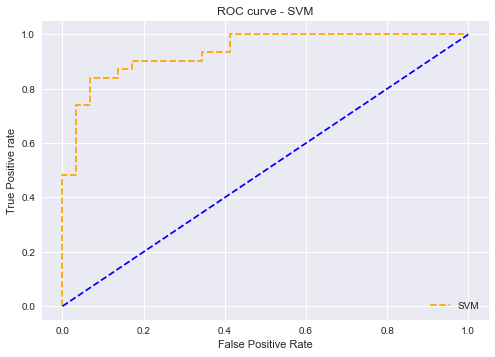

AUC Score:  0.9365962180200222
Total cost(SVM):  11487.32627118644


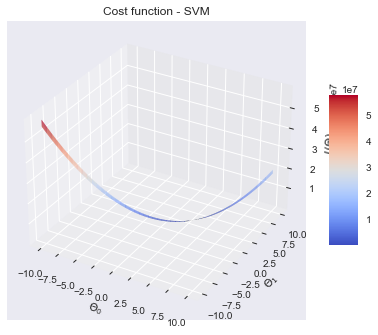

In [6]:
#########################################   SVM   #############################################################
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

# Compute confusion matrix
cm_test = confusion_matrix(y_test,y_pred)

print()
print('Confusion matrix - SVM')
print(cm_test)

print()

# Test set
ACC = (cm_test[0][0] + cm_test[1][1]) / L
PREC = (cm_test[0][0])/ (cm_test[0][0]+ cm_test[1][0])
TPR = (cm_test[0][0]) / (cm_test[0][0] + cm_test[0][1])
TNR = (cm_test[1][1])/ (cm_test[1][1] + cm_test[1][0])
FPR = 1-TNR
REC = (cm_test[0][0])/ (cm_test[0][0] + cm_test[0][1])
F1SCORE = 2 * (REC * PREC)/(REC+PREC)
BAL_ACC = (REC+TNR)/2

print('Accuracy for test set for SVM = ', ACC)
print('Precision for test set for SVM = ', PREC)
print('True Positive Rate for test set for SVM = ', TPR)
print('True Negative Rate for test set for SVM = ', TNR)
print('False Positive Rate for test set for SVM = ', FPR)
print('Recall for test set for SVM = ', REC)
print('F1 Score for test set for SVM = ', F1SCORE)
print('Balanced Accuracy for test set for SVM = ',BAL_ACC)

# roc curve for models
pred_prob1 = classifier.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve - SVM')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

print("AUC Score: ",auc_score1)


# Calculo da Cost Function

x_dados = X_train[:,0] # Age (236,)
y_dados = X_train[:,7] # Talach (236,)

x_dados = x_dados.reshape((len(x_dados),1)) #(236,1)
y_dados = y_dados.reshape((len(y_dados),1)) #(236,1)

x_dados=np.append(np.ones((len(x_dados),1)),x_dados,1) #(236,2)

theta= np.zeros((2,1)) #(2,1)

print('Total cost(SVM): ', Cost_Function(x_dados,y_dados,theta))


#Gerar valores para o theta_0 e theta_1 do h(x) e obter os custos associados

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)

J=np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        J[i,j]=Cost_Function(x_dados,y_dados,t)
        
# Plot da função de custo

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta_0,theta_1,J,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
plt.title("Cost function - SVM")
plt.show()


Confusion matrix - NB
[[25  4]
 [ 5 26]]

Accuracy for test set for Naive Bayes =  0.85
Precision for test set for Naive Bayes =  0.8333333333333334
True Positive Rate for test set for Naive Bayes =  0.8620689655172413
True Negative Rate for test set for Naive Bayes =  0.8387096774193549
False Positive Rate for test set for Naive Bayes =  0.16129032258064513
Recall for test set for Naive Bayes =  0.8620689655172413
F1 Score for test set for Naive Bayes =  0.847457627118644
Balanced Accuracy for test set for Naive Bayes =  0.850389321468298


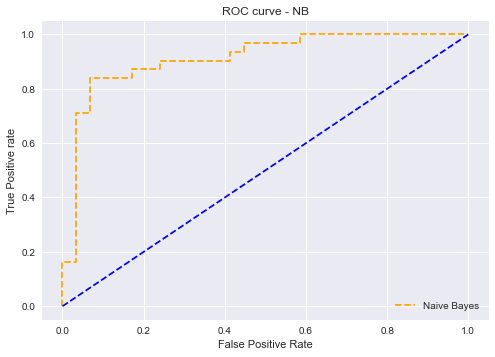

AUC Score:  0.9121245828698553
Total cost(NB):  11487.32627118644


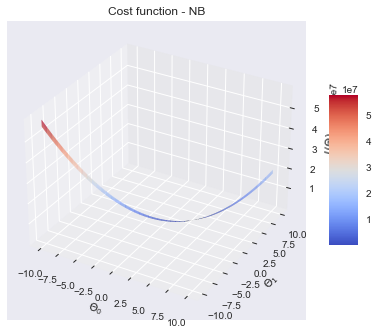

In [7]:
#########################################   Naive Bayes  #############################################################
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model and Fitting
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm_test = confusion_matrix(y_test,y_pred)

print()
print('Confusion matrix - NB')
print(cm_test)

print()

# Test set
ACC = (cm_test[0][0] + cm_test[1][1]) / L
PREC = (cm_test[0][0])/ (cm_test[0][0]+ cm_test[1][0])
TPR = (cm_test[0][0]) / (cm_test[0][0] + cm_test[0][1])
TNR = (cm_test[1][1])/ (cm_test[1][1] + cm_test[1][0])
FPR = 1-TNR
REC = (cm_test[0][0])/ (cm_test[0][0] + cm_test[0][1])
F1SCORE = 2 * (REC * PREC)/(REC+PREC)
BAL_ACC = (REC+TNR)/2

print('Accuracy for test set for Naive Bayes = ', ACC)
print('Precision for test set for Naive Bayes = ', PREC)
print('True Positive Rate for test set for Naive Bayes = ', TPR)
print('True Negative Rate for test set for Naive Bayes = ', TNR)
print('False Positive Rate for test set for Naive Bayes = ', FPR)
print('Recall for test set for Naive Bayes = ', REC)
print('F1 Score for test set for Naive Bayes = ', F1SCORE)
print('Balanced Accuracy for test set for Naive Bayes = ',BAL_ACC)

# roc curve for models
pred_prob1 = classifier.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve - NB')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

print("AUC Score: ",auc_score1)


# Calculo da Cost Function

x_dados = X_train[:,0] # Age (236,)
y_dados = X_train[:,7] # Talach (236,)

x_dados = x_dados.reshape((len(x_dados),1)) #(236,1)
y_dados = y_dados.reshape((len(y_dados),1)) #(236,1)

x_dados=np.append(np.ones((len(x_dados),1)),x_dados,1) #(236,2)

theta= np.zeros((2,1)) #(2,1)

print('Total cost(NB): ', Cost_Function(x_dados,y_dados,theta))


#Gerar valores para o theta_0 e theta_1 do h(x) e obter os custos associados

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)

J=np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        J[i,j]=Cost_Function(x_dados,y_dados,t)
        
# Plot da função de custo

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta_0,theta_1,J,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
plt.title("Cost function - NB")
plt.show()


Confusion matrix - DT
[[21 11]
 [ 8 20]]

Accuracy for test set for Decision Tree =  0.6833333333333333
Precision for test set for Decision Tree =  0.7241379310344828
True Positive Rate for test set for Decision Tree =  0.65625
True Negative Rate for test set for Decision Tree =  0.7142857142857143
False Positive Rate for test set for Decision Tree =  0.2857142857142857
Recall for test set for Decision Tree =  0.65625
F1 Score for test set for Decision Tree =  0.6885245901639345
Balanced Accuracy for test set for Decision Tree =  0.6852678571428572


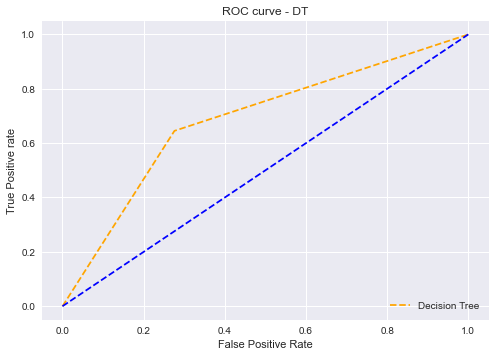

AUC Score:  0.6846496106785317
Total cost(DT):  11487.32627118644


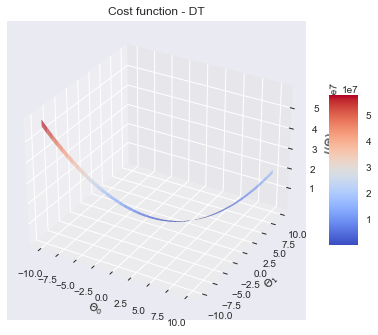

In [7]:
#########################################   Decision Tree  #############################################################
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Model and Fitting
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

print()
print('Confusion matrix - DT')
print(cm_test)

print()

#Test set
ACC = (cm_test[0][0] + cm_test[1][1]) / L
PREC = (cm_test[0][0])/ (cm_test[0][0]+ cm_test[1][0])
TPR = (cm_test[0][0]) / (cm_test[0][0] + cm_test[0][1])
TNR = (cm_test[1][1])/ (cm_test[1][1] + cm_test[1][0])
FPR = 1-TNR
REC = (cm_test[0][0])/ (cm_test[0][0] + cm_test[0][1])
F1SCORE = 2 * (REC * PREC)/(REC+PREC)
BAL_ACC = (REC+TNR)/2

print('Accuracy for test set for Decision Tree = ', ACC)
print('Precision for test set for Decision Tree = ', PREC)
print('True Positive Rate for test set for Decision Tree = ', TPR)
print('True Negative Rate for test set for Decision Tree = ', TNR)
print('False Positive Rate for test set for Decision Tree = ', FPR)
print('Recall for test set for Decision Tree = ', REC)
print('F1 Score for test set for Decision Tree = ', F1SCORE)
print('Balanced Accuracy for test set for Decision Tree = ',BAL_ACC)

# roc curve for models
pred_prob1 = classifier.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve - DT')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

print("AUC Score: ",auc_score1)

# Calculo da Cost Function

x_dados = X_train[:,0] # Age (236,)
y_dados = X_train[:,7] # Talach (236,)

x_dados = x_dados.reshape((len(x_dados),1)) #(236,1)
y_dados = y_dados.reshape((len(y_dados),1)) #(236,1)

x_dados=np.append(np.ones((len(x_dados),1)),x_dados,1) #(236,2)

theta= np.zeros((2,1)) #(2,1)

print('Total cost(DT): ', Cost_Function(x_dados,y_dados,theta))


#Gerar valores para o theta_0 e theta_1 do h(x) e obter os custos associados

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)

J=np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        J[i,j]=Cost_Function(x_dados,y_dados,t)
        
# Plot da função de custo

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta_0,theta_1,J,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
plt.title("Cost function - DT")
plt.show()

Confusion matrix - KNN
[[22 11]
 [ 9 18]]

Accuracy for test set for KNN =  0.6666666666666666
Precision for test set for KNN =  0.7096774193548387
True Positive Rate for test set for KNN =  0.6666666666666666
True Negative Rate for test set for KNN =  0.6666666666666666
False Positive Rate for test set for KNN =  0.33333333333333337
Recall for test set for KNN =  0.6666666666666666
F1 Score for test set for KNN =  0.6875
Balanced Accuracy for test set for KNN =  0.6666666666666666


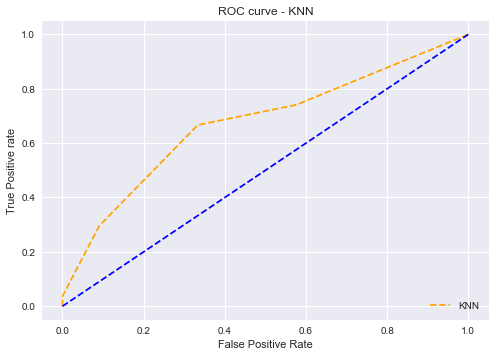

AUC Score:  0.6717171717171717
Total cost(kNN):  11487.32627118644


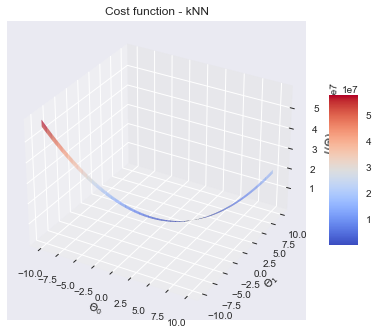

In [11]:
#########################################   K - Nearest Neighors  #############################################################
# Data Split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Model And Fitting
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm_test = confusion_matrix(y_test,y_pred)
print('Confusion matrix - KNN')
print(cm_test)

print()

#Test set
L = 60
ACC = (cm_test[0][0] + cm_test[1][1]) / L
PREC = (cm_test[0][0])/ (cm_test[0][0]+ cm_test[1][0])
TPR = (cm_test[0][0]) / (cm_test[0][0] + cm_test[0][1])
TNR = (cm_test[1][1])/ (cm_test[1][1] + cm_test[1][0])
FPR = 1-TNR
REC = (cm_test[0][0])/ (cm_test[0][0] + cm_test[0][1])
F1SCORE = 2 * (REC * PREC)/(REC+PREC)
BAL_ACC = (REC+TNR)/2

print('Accuracy for test set for KNN = ', ACC)
print('Precision for test set for KNN = ', PREC)
print('True Positive Rate for test set for KNN = ', TPR)
print('True Negative Rate for test set for KNN = ', TNR)
print('False Positive Rate for test set for KNN = ', FPR)
print('Recall for test set for KNN = ', REC)
print('F1 Score for test set for KNN = ', F1SCORE)
print('Balanced Accuracy for test set for KNN = ',BAL_ACC)

# roc curve for models
pred_prob1 = classifier.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve - KNN')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

print("AUC Score: ",auc_score1)

# Calculo da Cost Function

x_dados = X_train[:,0] # Age (236,)
y_dados = X_train[:,7] # Talach (236,)

x_dados = x_dados.reshape((len(x_dados),1)) #(236,1)
y_dados = y_dados.reshape((len(y_dados),1)) #(236,1)

x_dados=np.append(np.ones((len(x_dados),1)),x_dados,1) #(236,2)

theta= np.zeros((2,1)) #(2,1)

print('Total cost(kNN): ', Cost_Function(x_dados,y_dados,theta))


#Gerar valores para o theta_0 e theta_1 do h(x) e obter os custos associados

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)

J=np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        J[i,j]=Cost_Function(x_dados,y_dados,t)
        
# Plot da função de custo

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta_0,theta_1,J,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
plt.title("Cost function - kNN")
plt.show()

Total cost:  0.1077222454110846
h(x)_LogReg =0.22 + 0.16x1


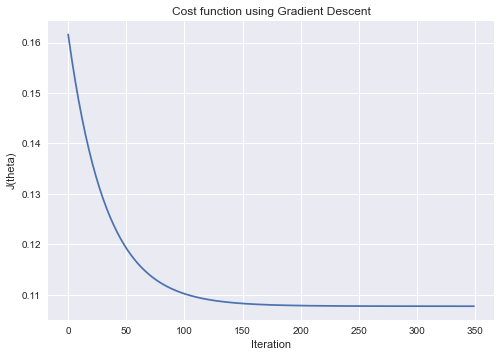

Total cost(generic data):  0.1077222454110846


In [9]:
# Gradient Decending Calculation

dados_grad = pd.read_csv('hear_cleveland_upload.txt', header= None)

data_grad = dados_grad.values

x_grad = data_grad[:,1] # Age
y_grad = data_grad[:,8] # Talach 

x_grad = x_grad.reshape((len(x_grad),1))
y_grad = y_grad.reshape((len(y_grad),1))

x_grad = np.append(np.ones((len(x_grad),1)),x_grad,1)

theta= np.zeros((2,1))

theta,J_custo_cada_itercao = gradienteFuncaoCusto(x_grad,y_grad,theta,0.01,350)

print('Total cost: ', Cost_Function(x_grad,y_grad,theta))
print("h(x)_LogReg ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

# Plot do gradiente da cost function

plt.plot(J_custo_cada_itercao)
plt.xlabel("Iteration")
plt.ylabel("J(theta)") 
plt.title("Cost function using Gradient Descent")
plt.show()


# Function Cost on Generic data

print('Total cost(generic data): ', Cost_Function(x_grad,y_grad,theta))